# Trist'n Joseph - IST 718 - Lab 2 (EDA)

## Packages

In [1]:
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
cleaned_data_path = "C:/Users/trist/OneDrive/Desktop/Trist'n/School/Syracuse University/Q4 2021/IST718/Labs/Lab 2/cleaned_zwillow_data.csv"
zwillow_sfr_df = pd.read_csv(cleaned_data_path)

In [3]:
zwillow_sfr_df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
# converting the data types such that they are apporpriate for analysis
zwillow_sfr_df['RegionID'] = zwillow_sfr_df['RegionID'].astype('string')
zwillow_sfr_df['SizeRank'] = zwillow_sfr_df['SizeRank'].astype('category')
zwillow_sfr_df['RegionName'] = zwillow_sfr_df['RegionName'].astype('string')
zwillow_sfr_df['RegionID'] = zwillow_sfr_df['RegionID'].astype('string')
zwillow_sfr_df['Date'] = zwillow_sfr_df['Date'].astype('datetime64[ns]')

## EDA

### Main Analysis Question: `Can we predict which three zip codes provide the best investment opportunity for the Syracuse Real Estate Investment Trust (SREIT)?

### Developing time series plots for Hot Springs, Little Rock, Fayetteville, and Searcy

In [5]:
ArkansasMetro = zwillow_sfr_df[zwillow_sfr_df['State']=='AR']
ArkansasMetro_hs_lr_f_s = ArkansasMetro[(ArkansasMetro['Metro'].str.contains('Hot Springs')) | (ArkansasMetro['Metro'].str.contains('Little Rock')) | (ArkansasMetro['Metro'].str.contains('Fayetteville')) | (ArkansasMetro['Metro'].str.contains('Searcy'))]
ArkansasMetro_hs_lr_f_s = ArkansasMetro_hs_lr_f_s[ArkansasMetro_hs_lr_f_s['Date'] >= '1997-01-31']

In [6]:
# zwillow_ImportantMetrost_path = "C:/Users/trist/OneDrive/Desktop/Trist'n/School/Syracuse University/Q4 2021/IST718/Labs/Lab 2/zwillow_ImportantMetros.csv"
# ArkansasMetro_hs_lr_f_s.to_csv(zwillow_ImportantMetrost_path)

In [7]:
ArkansasMetro_hs_lr_f_s.sort_values('Date').head(1)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,MedianHousingValue
148888,89249,332,71913,Zip,AR,AR,Hot Springs,Hot Springs,Garland County,1997-01-31,90258.0


In [8]:
ArkansasMetro_hs_lr_f_s.sort_values('Date').tail(1)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,MedianHousingValue
5519232,89322,33721,72037,Zip,AR,AR,Coy,Little Rock-North Little Rock-Conway,Lonoke County,2020-03-31,73570.0


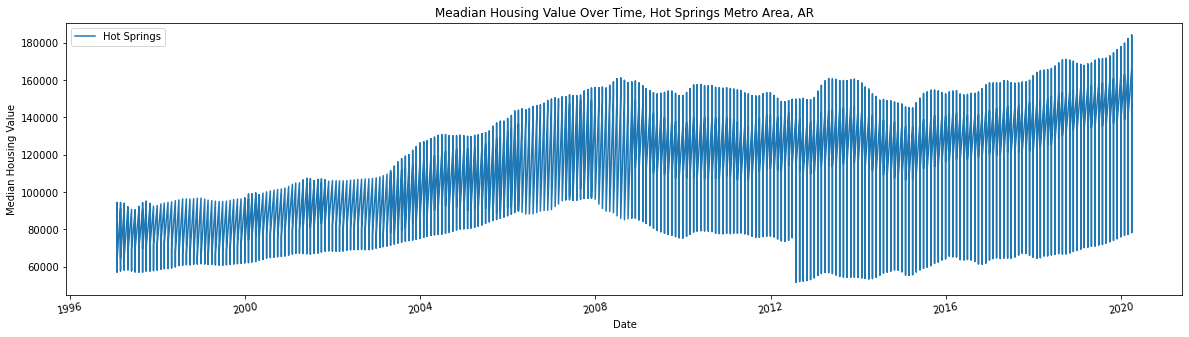

In [9]:
fig = plt.figure(figsize = (20, 5))
plt.plot(ArkansasMetro_hs_lr_f_s[ArkansasMetro_hs_lr_f_s['Metro']=='Hot Springs'].Date, ArkansasMetro_hs_lr_f_s[ArkansasMetro_hs_lr_f_s['Metro']=='Hot Springs'].MedianHousingValue, label='Hot Springs')
plt.xticks(rotation = 10)
plt.xlabel('Date')
plt.ylabel('Median Housing Value')
plt.title('Meadian Housing Value Over Time, Hot Springs Metro Area, AR')
plt.legend()
plt.show()

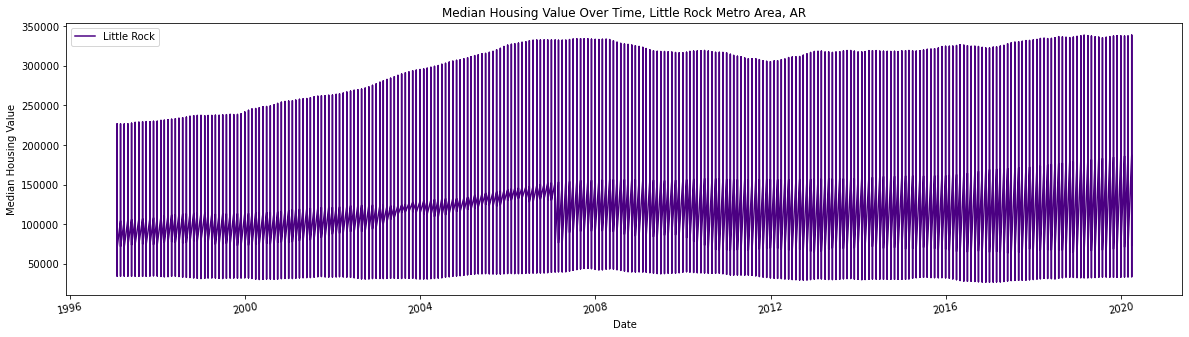

In [10]:
fig = plt.figure(figsize = (20, 5))
plt.plot(ArkansasMetro_hs_lr_f_s[ArkansasMetro_hs_lr_f_s['Metro'].str.contains('Little Rock')].Date, ArkansasMetro_hs_lr_f_s[ArkansasMetro_hs_lr_f_s['Metro'].str.contains('Little Rock')].MedianHousingValue, label='Little Rock', color='indigo')
plt.xticks(rotation = 10)
plt.xlabel('Date')
plt.ylabel('Median Housing Value')
plt.title('Median Housing Value Over Time, Little Rock Metro Area, AR')
plt.legend()
plt.show()

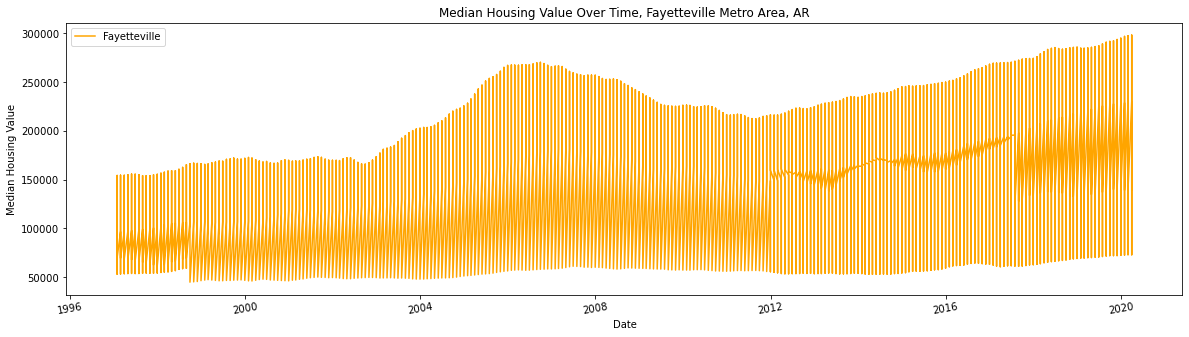

In [11]:
fig = plt.figure(figsize = (20, 5))
plt.plot(ArkansasMetro_hs_lr_f_s[ArkansasMetro_hs_lr_f_s['Metro'].str.contains('Fayetteville')].Date, ArkansasMetro_hs_lr_f_s[ArkansasMetro_hs_lr_f_s['Metro'].str.contains('Fayetteville')].MedianHousingValue, label='Fayetteville', color='orange')
plt.xticks(rotation = 10)
plt.xlabel('Date')
plt.ylabel('Median Housing Value')
plt.title('Median Housing Value Over Time, Fayetteville Metro Area, AR')
plt.legend()
plt.show()

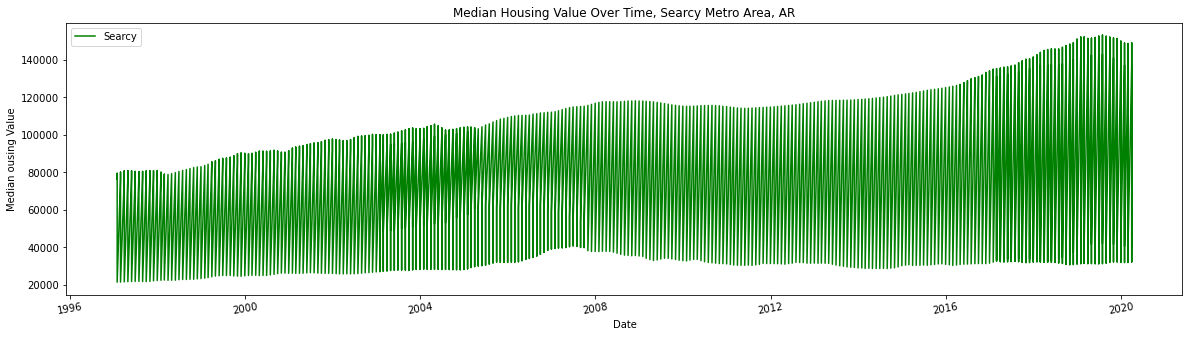

In [12]:
fig = plt.figure(figsize = (20, 5))
plt.plot(ArkansasMetro_hs_lr_f_s[ArkansasMetro_hs_lr_f_s['Metro']=='Searcy'].Date, ArkansasMetro_hs_lr_f_s[ArkansasMetro_hs_lr_f_s['Metro']=='Searcy'].MedianHousingValue, label='Searcy', color='green')
plt.xticks(rotation = 10)
plt.xlabel('Date')
plt.ylabel('Median ousing Value')
plt.title('Median Housing Value Over Time, Searcy Metro Area, AR')
plt.legend()
plt.show()

#### What is the average median housing value aggregated at the `Metro` level?

In [13]:
ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_Metro = ArkansasMetro_hs_lr_f_s \
    .groupby('Metro') \
    .agg(
        average_MedianHousingValue = pd.NamedAgg('MedianHousingValue', 'mean')
    ) \
    .sort_values('average_MedianHousingValue', ascending=False)

ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_Metro

,average_MedianHousingValue
Metro,
Fayetteville-Springdale-Rogers,131816.916178
Little Rock-North Little Rock-Conway,121091.259351
Hot Springs,110333.107011
Searcy,72064.268797


In [14]:
ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro = ArkansasMetro_hs_lr_f_s \
    .groupby(['Metro', 'Date']) \
    .agg(
        average_MedianHousingValue = pd.NamedAgg('MedianHousingValue', 'mean')
    ) \
    .sort_values(['Date',  'Metro'], ascending=[True, False])

ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro

,,average_MedianHousingValue
Metro,Date,
Searcy,1997-01-31,57560.583333
Little Rock-North Little Rock-Conway,1997-01-31,87378.959184
Hot Springs,1997-01-31,77182.600000
Fayetteville-Springdale-Rogers,1997-01-31,96579.645161
Searcy,1997-02-28,57887.666667
...,...,...
Fayetteville-Springdale-Rogers,2020-02-29,178468.000000
Searcy,2020-03-31,86115.611111
Little Rock-North Little Rock-Conway,2020-03-31,140491.000000


In [15]:
Metros = []
Dates = []
for i in range(0, len(ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro.index)):
    Metros.append(ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro.index[i][0])
    Dates.append(ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro.index[i][1])

ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro['Metros'] = Metros
ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro['Dates'] = Dates

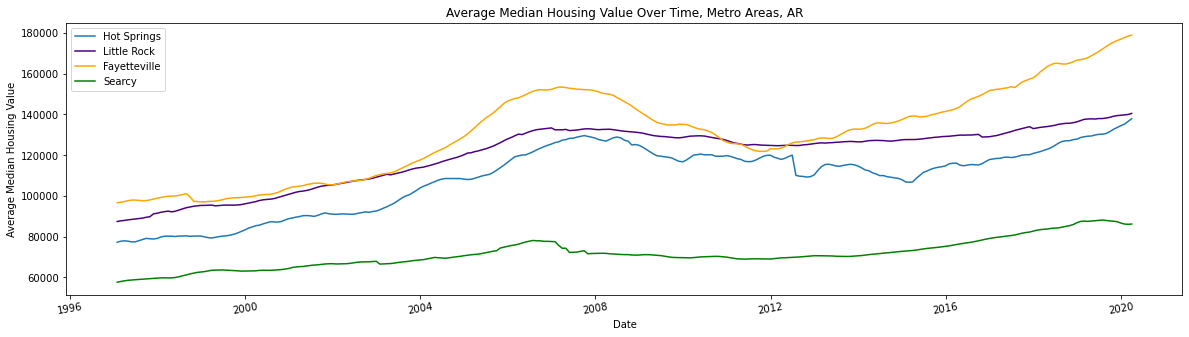

In [16]:
fig = plt.figure(figsize = (20, 5))
plt.plot(ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro[ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro['Metros']=='Hot Springs'].Dates, ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro[ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro['Metros']=='Hot Springs'].average_MedianHousingValue, label='Hot Springs')
plt.plot(ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro[ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro['Metros'].str.contains('Little Rock')].Dates, ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro[ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro['Metros'].str.contains('Little Rock')].average_MedianHousingValue, label='Little Rock', color='indigo')
plt.plot(ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro[ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro['Metros'].str.contains('Fayetteville')].Dates, ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro[ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro['Metros'].str.contains('Fayetteville')].average_MedianHousingValue, label='Fayetteville', color='orange')
plt.plot(ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro[ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro['Metros']=='Searcy'].Dates, ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro[ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro['Metros']=='Searcy'].average_MedianHousingValue, label='Searcy', color='green')
plt.xticks(rotation = 10)
plt.xlabel('Date')
plt.ylabel('Average Median Housing Value')
plt.title('Average Median Housing Value Over Time, Metro Areas, AR')
plt.legend()
plt.show()

When analyzing the AR Metro Areas, it can be seen that housing values in the Fayetteville area have increased the most (out of the 4 metro areas). 

### Splitting the data into training and testing

In [17]:
# using data from 1997 - 2017 as the training set
zwillow_train = ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro[(ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro['Dates'] >= '1997-01-31') & (ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro['Dates'] <= '2017-12-31')]
zwillow_test = ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro[ArkansasMetro_hs_lr_f_s__avg_MedianHousingValue_DateMetro['Dates'] >= '2018-01-31']

# zwillow_train_path = "C:/Users/trist/OneDrive/Desktop/Trist'n/School/Syracuse University/Q4 2021/IST718/Labs/Lab 2/zwillow_training_data.csv"
# zwillow_test_path = "C:/Users/trist/OneDrive/Desktop/Trist'n/School/Syracuse University/Q4 2021/IST718/Labs/Lab 2/zwillow_testing_data.csv"

# zwillow_train.to_csv(zwillow_train_path)
# zwillow_test.to_csv(zwillow_test_path)

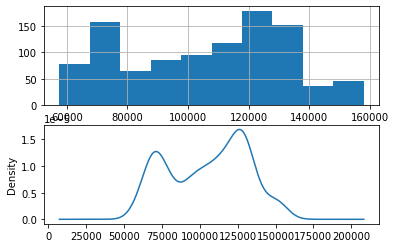

In [18]:
fig = plt.figure(3)
plt.subplot(211)
zwillow_train.average_MedianHousingValue.hist()
plt.subplot(212)
zwillow_train.average_MedianHousingValue.plot(kind='kde')
plt.show()

<ipython-input-19-9e0742cd0894>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zwillow_train['Year'] = zwillow_train['Dates'].dt.year


[Text(0, 0.5, 'Average Median Housing Value ($ Millions)'),
 Text(0.5, 1.0, 'Distribution of Average Median Housing Value by Year')]

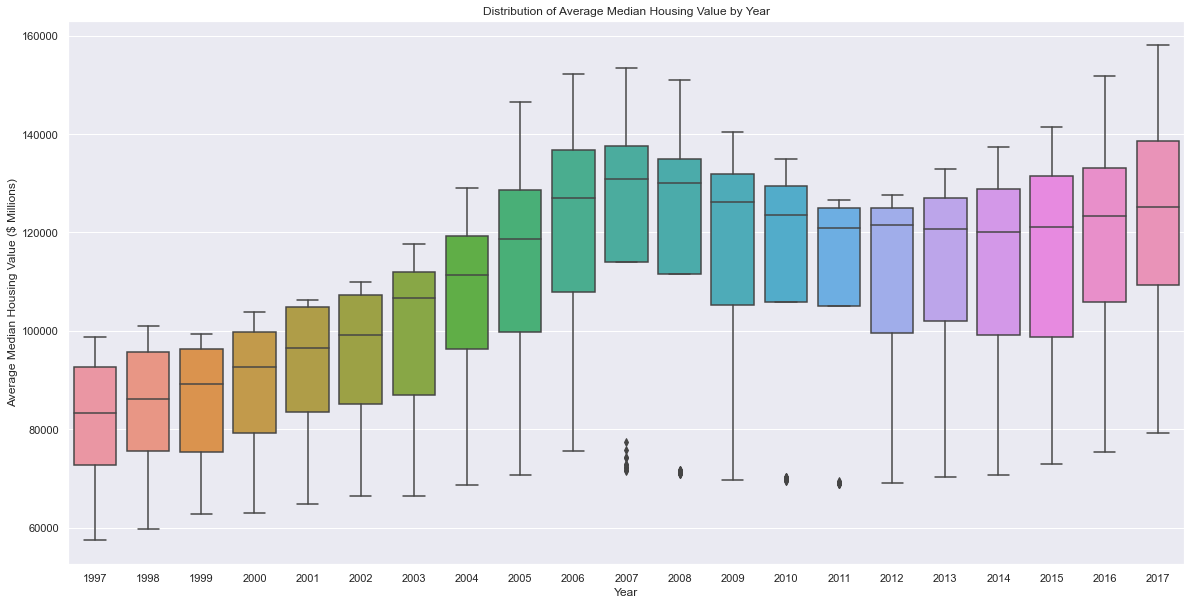

In [19]:
# plotting the distribution of average_MedianHousingValue
zwillow_train['Year'] = zwillow_train['Dates'].dt.year

sns.set_theme(style='whitegrid')
sns.set(rc={'figure.figsize':(20, 10)})
ax = sns.boxplot(x='Year', y='average_MedianHousingValue', data=zwillow_train)
ax.set(ylabel='Average Median Housing Value ($ Millions)', title='Distribution of Average Median Housing Value by Year')

The distribution above indicates that the housing values have increased over the years, and the number of outliers within the data was most present during 2007. 
The average of housing values reached it peak in 2007, and then gently tapered off up until 2017.

This suggests that there is a trend in the data; and thus, the data might be non-stationary.

In [20]:
# finding the median value
zwillow_MedianValue_train = zwillow_train \
    .groupby('Dates') \
    .agg(
        HousingValue = pd.NamedAgg('average_MedianHousingValue', 'median')
    )

zwillow_MedianValue_test = zwillow_test \
    .groupby('Dates') \
    .agg(
        HousingValue = pd.NamedAgg('average_MedianHousingValue', 'median')
    )

Date_train = []
Date_test = []

for date in zwillow_MedianValue_train.index:
    Date_train.append(date)
    
for date in zwillow_MedianValue_test.index:
    Date_test.append(date)
    

zwillow_MedianValue_train['Date'] = Date_train
zwillow_MedianValue_test['Date'] = Date_test

In [21]:
# zwillow_median_train_path = "C:/Users/trist/OneDrive/Desktop/Trist'n/School/Syracuse University/Q4 2021/IST718/Labs/Lab 2/zwillow_Median_training_data.csv"
# zwillow_median_test_path = "C:/Users/trist/OneDrive/Desktop/Trist'n/School/Syracuse University/Q4 2021/IST718/Labs/Lab 2/zwillow_Median_testing_data.csv"

# zwillow_MedianValue_train.to_csv(zwillow_median_train_path)
# zwillow_MedianValue_test.to_csv(zwillow_median_test_path)

In [22]:
# time series decomp
fig = plt.figure(figsize = (10000, 5))
zwillow_ts_decomposition = seasonal_decompose(zwillow_MedianValue_train.HousingValue, model='additive', period=1)
# zwillow_ts_decomposition.plot()

zwillow_MedianValue_train['seasonality'] = zwillow_ts_decomposition.seasonal
zwillow_MedianValue_train['trend'] = zwillow_ts_decomposition.trend
zwillow_MedianValue_train['residual'] = zwillow_ts_decomposition.resid

<Figure size 720000x360 with 0 Axes>

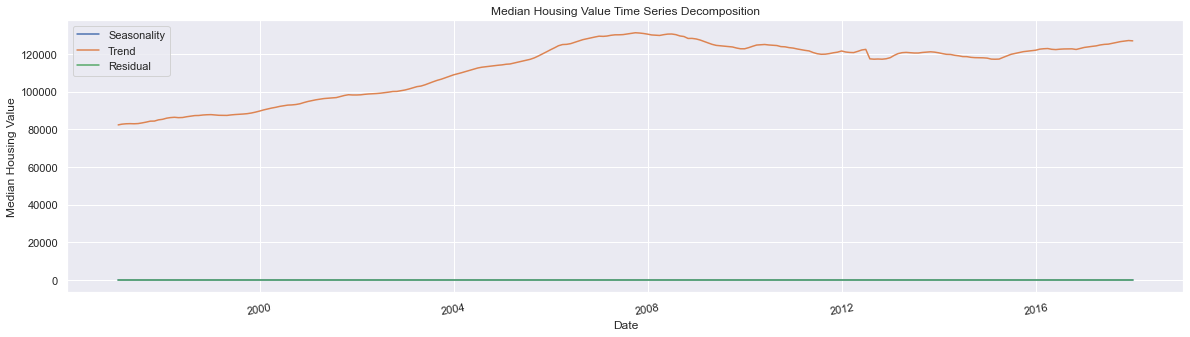

In [23]:
fig = plt.figure(figsize = (20, 5))
plt.plot(zwillow_MedianValue_train.Date, zwillow_MedianValue_train.seasonality, label='Seasonality')
plt.plot(zwillow_MedianValue_train.Date, zwillow_MedianValue_train.trend, label='Trend')
plt.plot(zwillow_MedianValue_train.Date, zwillow_MedianValue_train.residual, label='Residual')
plt.xticks(rotation = 10)
plt.xlabel('Date')
plt.ylabel('Median Housing Value')
plt.title('Median Housing Value Time Series Decomposition')
plt.legend()
plt.show()

The time series decomposition indicates that there is no seasonality within the data, but there is a strong positive trend. 

To verify this assumption, the Dickey-Fuller Test for stationarity is necessary.

In [24]:
def test_stationarity(timeseries):
         
    # Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:') 
    dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

In [25]:
zwillow_stationary_ts = zwillow_MedianValue_train

In [26]:
zwillow_stationary_ts.drop(['Date', 'seasonality', 'trend', 'residual'], 1, inplace=True)

In [27]:
test_stationarity(zwillow_MedianValue_train)

Results of Dickey-Fuller Test:
Test Statistic                  -2.084367
p-value                          0.250847
# Lags Used                      2.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


The null hypothesis of DF test suggests that the data series is not stationary.

With a p-value of `0.250847`, there is not enough evidence at the 5% level of significance to reject the null hypothesis. Therefore, it is likely that the data series is not stationary.